In [1]:
from tvemoves_rufbad.simulation import Simulation, SimulationParams
from tvemoves_rufbad.domain import RectangleDomain
%load_ext autoreload
%autoreload 2

In [97]:
params = SimulationParams(initial_temperature=0.0, search_radius=10.0, fps=0.05, scale=1/8)
domain = RectangleDomain(width=1.0, height=1.0, fix=["lower", "upper"])
sim = Simulation(domain, params)

In [98]:
sim.run(num_steps=20)

100%|██████████| 60/60 [03:13<00:00,  3.23s/it]


In [99]:
sim.max_temp()

0.00029728594838666667

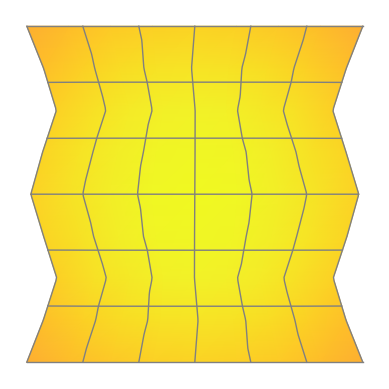

In [100]:
sim.plot_step(-1)